In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import folium
import matplotlib.dates

In [2]:
# reading file
df=pd.read_excel("ANZ_transactions.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# shape of the dataframe

df.shape

(12043, 23)

In [4]:
# info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

### Missing values

In [5]:
# total null values

df.isnull().sum()  

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
# classifying NA as categorical or numerical 

null_values=df[['card_present_flag','bpay_biller_code','merchant_id','merchant_code','merchant_suburb','merchant_state','merchant_long_lat']]
null_values_cat=null_values.select_dtypes(include='object')
null_values_num=null_values.select_dtypes(exclude='object')

print("Categorical columns containing null values are: ",null_values_cat.columns.values)
print("\n")
print("Numerical columns containing null values are: ",null_values_num.columns.values)

Categorical columns containing null values are:  ['bpay_biller_code' 'merchant_id' 'merchant_suburb' 'merchant_state'
 'merchant_long_lat']


Numerical columns containing null values are:  ['card_present_flag' 'merchant_code']


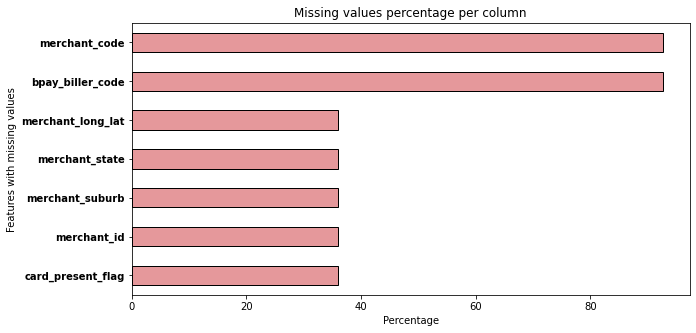

In [7]:
# visulaizing missing values percentage

plt.figure(figsize=(10,5))
allna = (df.isnull().sum() / len(df))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
allna.plot.barh(color=('#e5989b'), edgecolor='black')
plt.title('Missing values percentage per column')
plt.xlabel('Percentage')
plt.ylabel('Features with missing values')
plt.yticks(weight='bold')
plt.show()

<font color='blue'>Inferences:</font>
* merchant_code and bpay_biller_code has many null values.

In [8]:
# removing unnecessary columns

df.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   balance            12043 non-null  float64       
 9   date               12043 non-null  datetime64[ns]
 10  gender             12043 non-null  object        
 11  age                12043 non-null  int64         
 12  merchant_suburb    7717 non-null   object        
 13  merchant_state     7717 non-null   object        
 14  extrac

### Correlation

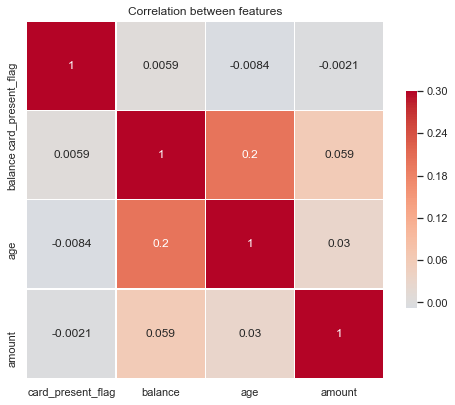

In [59]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))

# Building heatmap
sns.heatmap(df.corr() ,vmax=.3 , center=0 , cmap='coolwarm',
            square=True , linewidths=.5 , cbar_kws={'shrink': .5}, 
            annot = True)
plt.title("Correlation between features")
plt.show()

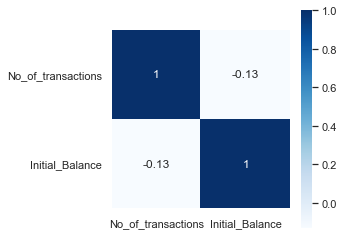

In [62]:
#checking for correlation between number of transactions and intial balance of each customer.
bal_tran = pd.DataFrame(df['account'].value_counts(), index=None)
bal_tran = bal_tran.reset_index()

bal_list = []
for index, row in bal_tran.iterrows():
#     print(index, row)
    bal = df[df['account'] == row['index']]['balance'].index
    bal_list.append(df.loc[bal[0],'balance'])
    
    
bal_tran['balance'] = bal_list

bal_tran.rename(columns={"index": "Account", "account": "No_of_transactions","balance":"Initial_Balance"}, inplace = True)

#plotting correlation

plt.figure(figsize=(4,4))
sns.heatmap(bal_tran.corr(), cmap = 'Blues', square = True, annot = True)
plt.show()

In [12]:
# average of some numerical data

df.mean()

card_present_flag        0.802644
balance              14704.195553
age                     30.582330
amount                 187.933588
dtype: float64

<font color = 'blue'>Inferences:</font><br><br>
In the 3 months of transaction data:<br>

* There is no correlation between transactions and intial balance of each customer
* The average age group of customers who made the transactions are 30 years of age.
* The average balance a customer have in their account is 14704 AUD.
* The average transaction made by the customer is 187.93 AUD.

### Transaction Trend

Text(0, 0.5, 'Number of transactions')

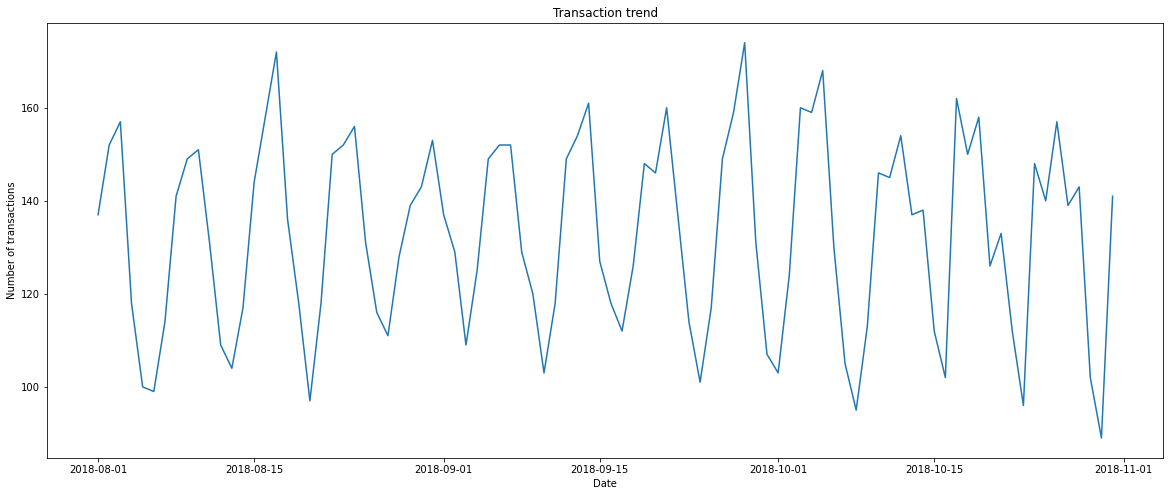

In [13]:
# visualize transaction trend

transaction_trend=df.groupby(['date'])
transaction_trend_count=transaction_trend.date.count()

plt.figure(figsize=(20,8))
sns.lineplot(data=transaction_trend_count)
plt.title("Transaction trend")
plt.xlabel("Date")
plt.ylabel("Number of transactions")

# 1. Month analysis

<h2><font color = 'red'> Day and Month extraction from date column

In [14]:
# converting the date column to pandas Timestamp

df['date'] = pd.to_datetime(df['date'])

In [15]:
# extracting day name 

df['day_name'] = df['date'].dt.day_name()
df['day_name'].tail()

12038    Wednesday
12039    Wednesday
12040    Wednesday
12041    Wednesday
12042    Wednesday
Name: day_name, dtype: object

In [16]:
# extracting month name

df['month_name'] = df['date'].dt.month_name()
df['month_name'].tail()

12038    October
12039    October
12040    October
12041    October
12042    October
Name: month_name, dtype: object

In [17]:
# months generated

df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

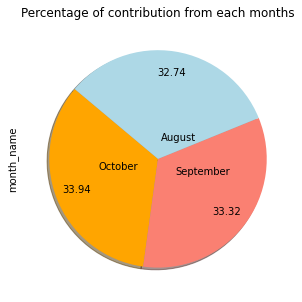

In [18]:
# visualize percentage of contribution from each month
my_colors = ['r','b','k','y','m','c','#16A085','salmon' , '#32e0c4']
pie_color = ['orange' , 'salmon', 'lightblue']
fig,ax = plt.subplots(figsize=(5,5)) # (height,width)

df['month_name'].value_counts(sort=True).plot.pie(labeldistance=0.2 ,
                                         colors=pie_color,
                                        autopct='%.2f', shadow=True, startangle=140,pctdistance=0.8 , radius=1)
plt.title("Percentage of contribution from each months")
plt.show()

<font color = 'blue'> Inferences:</font>
* The data contains the transactions occured in the months <font color = 'red'> August, September and October </font> only
* The number of transactions in each month are almost equal.

In [19]:
# month wise transaction amount

month_amount=df.groupby(['month_name']).amount.agg([sum])
#sorting the values
month_amount=month_amount.sort_values(by='sum',ascending=False)
month_amount

,sum
month_name,
October,802798.47
September,730550.21
August,729935.52


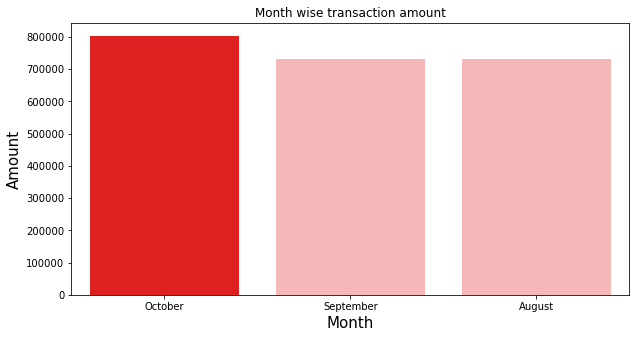

In [20]:
#plotting month wise transaction amount

plt.figure(figsize = (10,5))
clrs = ['#ffadad' if (x < max(month_amount['sum'].values)) else 'red' for x in month_amount['sum'].values ]
sns.barplot(x = month_amount['sum'].index.values, y = month_amount['sum'].values, palette=clrs)
plt.title("Month wise transaction amount")
plt.ylabel("Amount",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.show()

* Out of August, September and October , <font color = 'red'>October</font> has higher amount of transactions.

month_name
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


Text(0.5, 1.0, 'Average transaction amount each month')

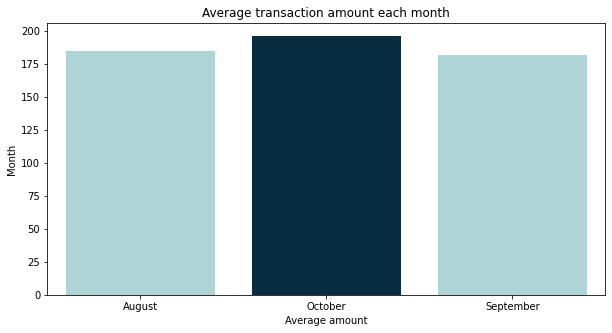

In [21]:
# plotting average transaction amount each month

month_grp = df.groupby(['month_name'])
avg_transaction_amount_per_month = month_grp['amount'].mean()

fig,ax = plt.subplots(figsize=(10,5)) 
print(avg_transaction_amount_per_month);
clrs = ['#a8dadc' if (x < max(avg_transaction_amount_per_month.values)) else '#003049' for x in avg_transaction_amount_per_month.values ]
sns.barplot(x = avg_transaction_amount_per_month.index.values, y = avg_transaction_amount_per_month.values, palette=clrs)
ax.set(xlabel="Average amount",
      ylabel="Month")
plt.title('Average transaction amount each month')

# 2. Gender wise transaction analysis

In [22]:
# gender wise transaction count

df.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

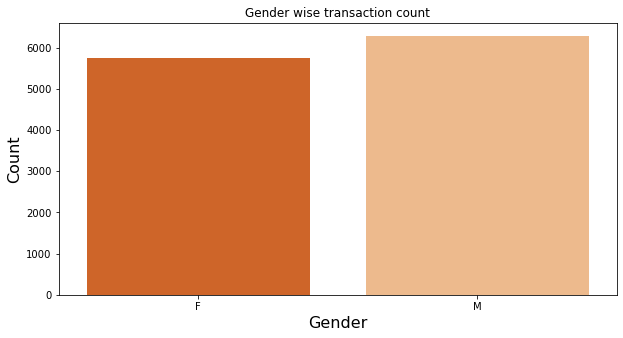

In [23]:

# visualize gender wise transaction count

plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'gender', data = df, palette = 'Oranges_r')
ax.set_title(label = 'Gender wise transaction count')
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_xlabel(xlabel = 'Gender', fontsize = 16)
plt.show()

<font color = 'blue'>Inference: </font>
* male customers made higher number of transactions.

Text(0.5, 1.0, 'Percentage of contribution from gender')

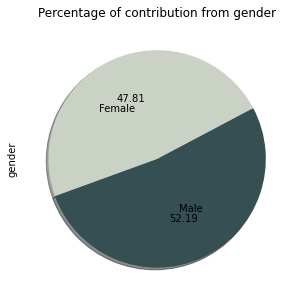

In [24]:
# visualize percentage of contribution from each gender 

plt.figure(figsize=(5,5))
pie_color = ['#354f52', '#cad2c5']
df['gender'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['Male','Female'], 
                                                   labeldistance=0.5 ,
                                                   colors = pie_color,
                                                   shadow = True,
                                                   startangle=200, radius=1)
plt.title('Percentage of contribution from gender')

In [25]:
# gender wise transaction amount

gender_sum =df.groupby(['gender']).amount.sum()
gender_sum

gender
F     970322.63
M    1292961.57
Name: amount, dtype: float64

In [26]:
# average transaction amount by gender 

avg_gen_trans_amt = df.groupby(['gender']).amount.mean()
print(avg_gen_trans_amt)

gender
F    168.517303
M    205.721809
Name: amount, dtype: float64


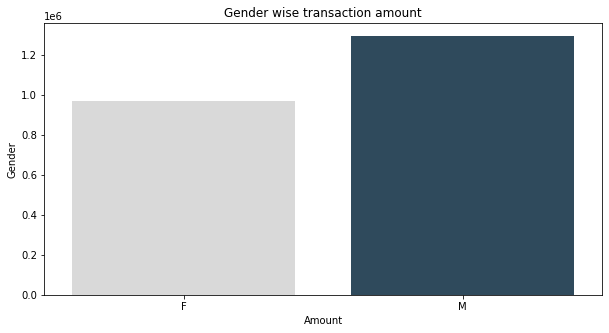

In [27]:
# visualize gender wise transaction amount

fig,ax = plt.subplots(figsize=(10,5))
clrs = ['#d9d9d9' if (x < max(gender_sum.values)) else '#284b63' for x in gender_sum.values ]
sns.barplot(y = gender_sum.values, x = gender_sum.index.values, palette=clrs)
plt.title("Gender wise transaction amount")
plt.ylabel("Gender")
plt.xlabel("Amount")
plt.show()

Text(0, 0.5, 'Count')

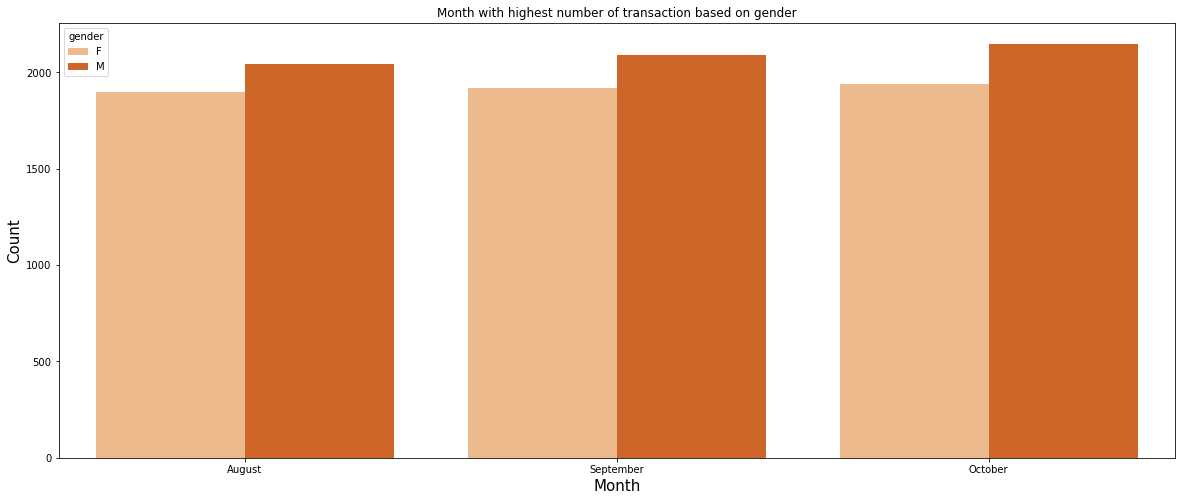

In [28]:
# visualize month with highest number of transaction based on gender

plt.figure(figsize=(20,8))
sns.countplot(x='month_name' ,hue='gender', data=df, palette = 'Oranges')
plt.title('Month with highest number of transaction based on gender')
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count",fontsize=15)

<font color= 'blue'>Inference: </font>
* Male customers have done more number of transactions than Female customers.
* Male customers have done higher number of transactions in all the months.
* Overall, Male customers dominate the transactions

# 3. Day wise transaction analysis

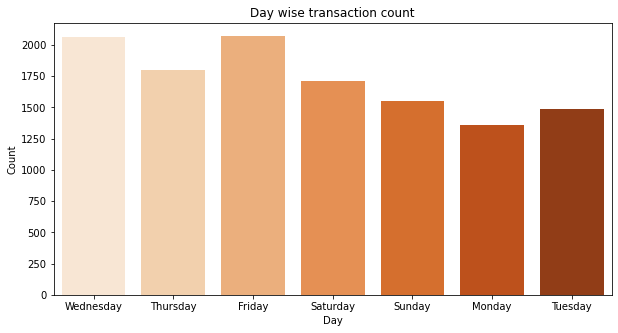

In [29]:
# visualize day wise transaction count

plt.figure(figsize=(10,5))
sns.countplot(x='day_name' , data=df, palette = 'Oranges')
plt.title("Day wise transaction count")
plt.ylabel("Count")
plt.xlabel("Day")
plt.show()

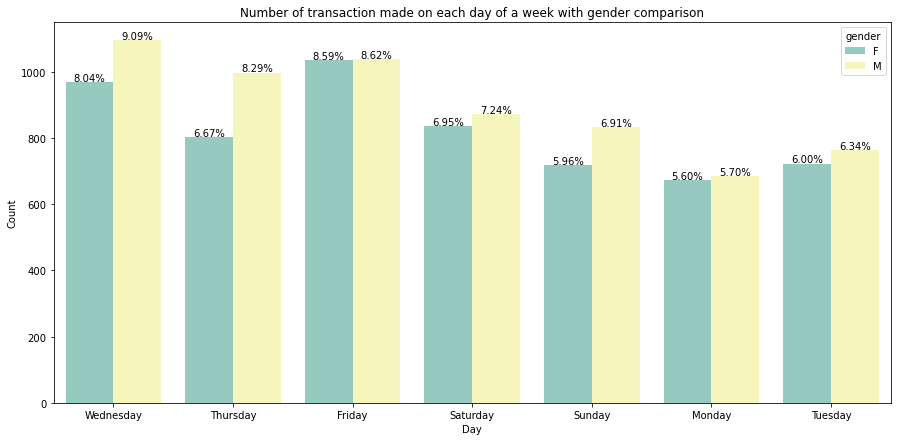

In [30]:
# visualize day wise gender transaction count

plt.figure(figsize=(15,7))
ax = sns.countplot(x="day_name", hue="gender", data=df, palette = "Set3")
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.ylabel("Count")
plt.xlabel("Day")
plt.title('Number of transaction made on each day of a week with gender comparison')
plt.show()

<font color = 'blue'> Inference </font>
* Wednesday and Friday have recorded most number of transactions
* Male customers do higher number of transactions everyday.

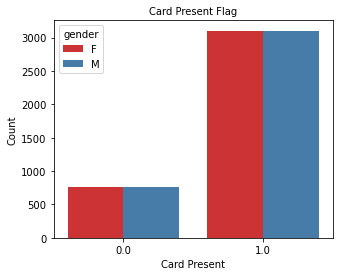

In [31]:
# number of male and female customers with card presence
card_present = df.card_present_flag.value_counts()

# plotting status

fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(x = 'card_present_flag', hue = 'gender', data=df, palette = 'Set1')
ax.set(xlabel="Card Present",
      ylabel="Count")
plt.title('Card Present Flag', size = 10)
plt.show()



# 4. Age wise transaction analysis

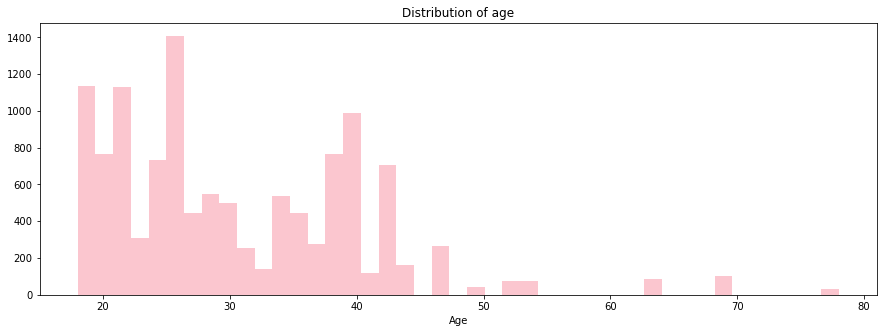

In [32]:
# visualize distribution of age

plt.figure(figsize=(15,5))
palette = sns.husl_palette(len(df['age']))
sns.distplot(df['age'], kde= False, color = palette[0]);
plt.title('Distribution of age')
plt.xlabel('Age')
plt.show()

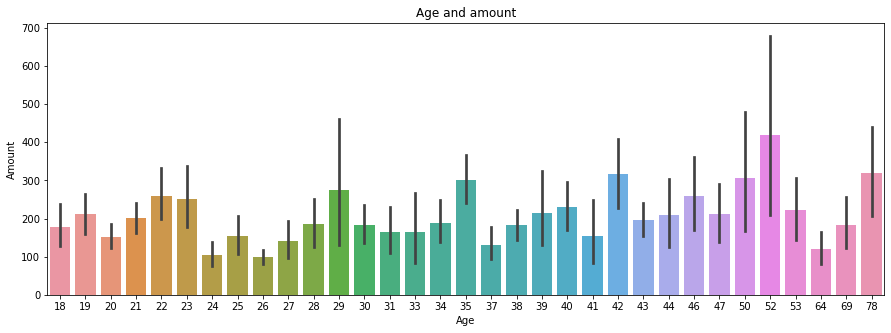

In [33]:
# visualize age with amount

plt.figure(figsize=(15,5))
sns.barplot(x='age' , y='amount' , data=df)
plt.title('Age and amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

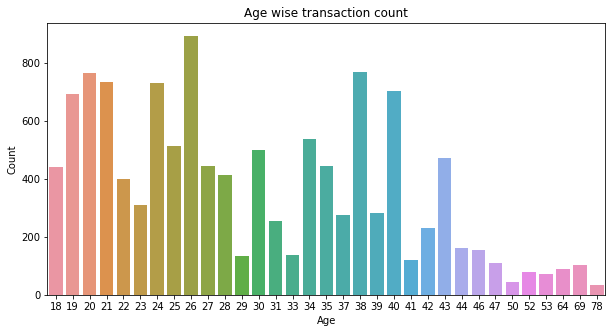

In [34]:
# visualize age wise transaction count

plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'age', data = df)
ax.set_title(label = 'Age wise transaction count')
ax.set_ylabel(ylabel = 'Count')
ax.set_xlabel(xlabel = 'Age')
plt.show()

<font color = 'blue'> Inference: </font>
* Most number of transactions are done by the age group of 20-50.
* Highest transaction amounts are recorded by the customers with age of 26.

# 5. Type of transaction

In [35]:
# visualize type of transaction

print(df['txn_description'].value_counts())

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


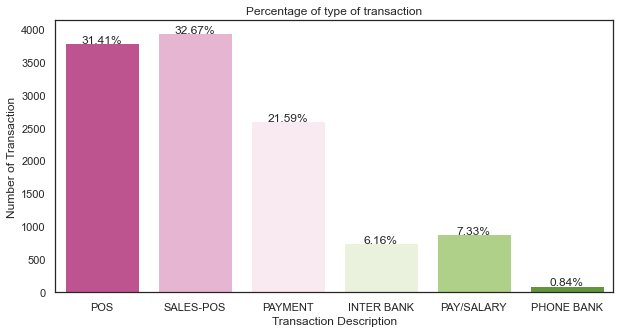

In [36]:
sns.set(style='white')
plt.figure(figsize=(10,5))
ax = sns.countplot(df['txn_description'], palette = 'PiYG')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.title('Percentage of type of transaction')
plt.ylabel('Number of Transaction')
plt.xlabel('Transaction Description')
plt.show()

<font color = 'blue'> Inference: </font>
* Most of the transactions are done via POS and SALES-POS
* Least number of transactions are done via PHONE Bank

## State Wise Transaction Analysis

In [37]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [38]:
#changing the names of the states to full forms for map visualization.
states = {'NSW':'New South Wales',
'QLD':'Queensland',
'SA':'South Australia',
'TAS':'Tasmania',
'VIC':'Victoria',
'WA':'Western Australia',
'ACT':'Australian Capital Territory',
'NT':'Northern Territory'}

df['merchant_state_full'] = df['merchant_state'].map(states)

df['merchant_state_full'].value_counts()

New South Wales                 2169
Victoria                        2131
Queensland                      1556
Western Australia               1100
South Australia                  415
Northern Territory               205
Australian Capital Territory      73
Tasmania                          68
Name: merchant_state_full, dtype: int64

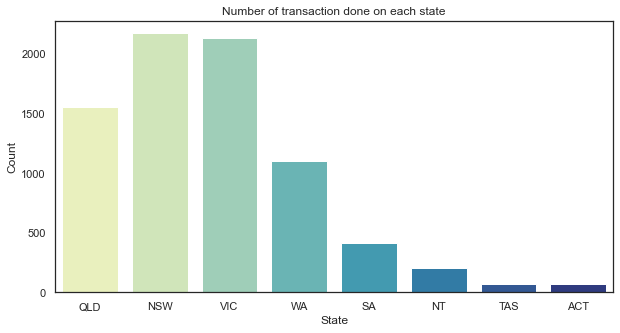

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(df['merchant_state'], palette = 'YlGnBu')
plt.title('Number of transaction done on each state')
plt.ylabel("Count")
plt.xlabel("State")
plt.show()

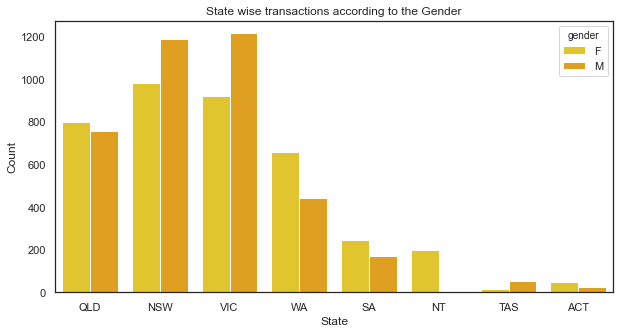

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'merchant_state', hue= 'gender', data=df, palette = 'Wistia')
plt.title('State wise transactions according to the Gender')
plt.ylabel("Count")
plt.xlabel("State")
plt.show()

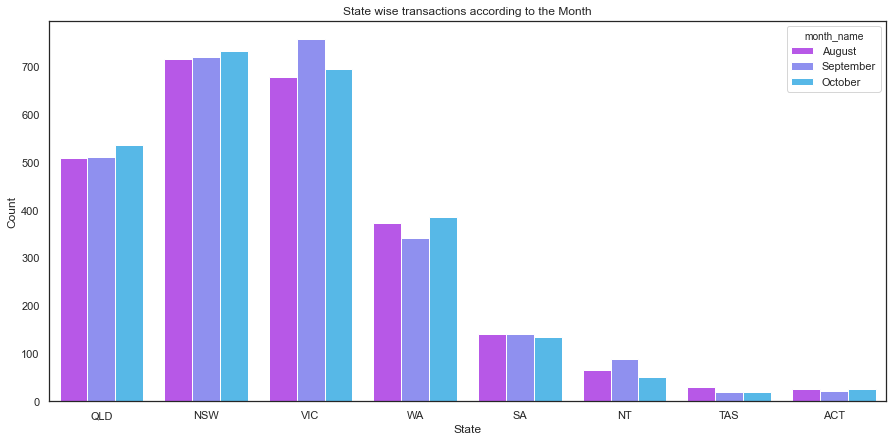

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'merchant_state', hue= 'month_name', data=df, palette = 'cool_r')
plt.title('State wise transactions according to the Month')
plt.ylabel("Count")
plt.xlabel("State")
plt.show()

<font color='blue'>Inferneces:</font>
* <font color = 'red'>New South Wales(NSW)</font> has recorded the highest number of transcations
* <font color = 'red'>Tasmania(TAS) and Austrailian Capital Territory(ACT)</font> have the recorded least number of transactions.
* Number of transactions recorded in every month in all the states are approximately equal.
* Transactions done by male customers are greater in <font color = 'green'>New South Wales(NSW) and Victoria(VIC)</font>

# Top Customers

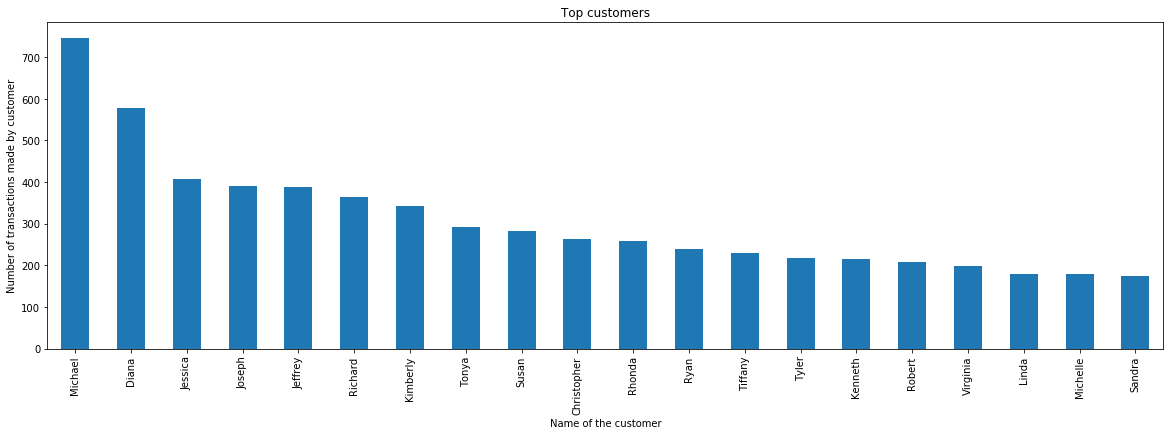

In [3]:
# plotting top customers
top_customers = df['first_name'].value_counts()[:20]
fig,ax = plt.subplots(figsize=(20,6)) # (height,width)
top_customers.plot.bar()
ax.set(ylabel="Number of transactions made by customer",
      xlabel="Name of the customer")
plt.title('Top customers')
plt.show()

# Map Vizualizations

In [44]:
temp_dict = {'merchant_state':['New South Wales','Victoria','Queensland','Western Australia','South Australia','Northern Territory',
                         'Australian Capital Territory','Tasmania'],'count': [2169,2131,1556,1100,415,205,73,68],
        'lat':[-31.840233, -37.020100, -20.917574, -25.042261, -30.000233, -19.491411, 35.4735, 41.4545],
        'long':[145.612793, 144.964600, 142.702789, 117.793221, 136.209152, 132.550964, 149.0124, 145.9707]}
         
new_df = pd.DataFrame(temp_dict)

In [45]:
x = folium.Map(
    location=[-31.840233, 145.612793],
    zoom_start=4,
    tiles='Stamen Terrain'
)

In [46]:
for index, row in new_df.iterrows():
        
    folium.Circle(
          location=[row['lat'], row['long']],
          popup= 'Transactions: ' +str(row['count']),
          tooltip=row['merchant_state'] ,
          radius=row['count']*50,
          color='#3d5a80',
          fill=True,
          fill_color='black',
       ).add_to(x)

In [47]:
x

In [48]:
#merchant lattitude and longitude
lat = df.groupby(['first_name'])['long_lat'].value_counts()

name_list = []
lat_list = []
long_list = []
for i in lat.index.values:
    name_list.append(i[0])
    long_list.append(i[1].split(' ')[0])
    lat_list.append(i[1].split(' ')[1])

lat_long_df = pd.DataFrame(list(zip(name_list,long_list,lat_list)), columns = ['name', 'long','lat'])
lat_long_df.head()

,name,long,lat
0,Abigail,138.58,-34.96
1,Alexander,143.88,-37.66
2,Amy,142.77,-37.06
3,Andrew,145.09,-37.82
4,Antonio,115.78,-31.90


In [49]:
y = folium.Map(
    location=[-34.96, 138.58],
    zoom_start=4,
    tiles='Stamen Terrain'
)

In [50]:
for index, row in lat_long_df.iterrows():
        
    folium.Marker(
          location=[row['lat'], row['long']],
          tooltip=row['name'] 
       ).add_to(y)

In [51]:
y